In [30]:
import bs4 as bs
import datetime as dt
import os
import pandas_datareader.data as web
import pickle
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import mpld3
from alpha_vantage.timeseries import TimeSeries
mpld3.enable_notebook()
style.use('ggplot')

In [50]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    n=1
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        n+=1
        print(n)
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        print(n)
    return tickers
    
save_sp500_tickers() ##Saving Tciker names

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS'

In [51]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists(r'C:\Users\User\Desktop\Code!\stock_dfs'):
        os.makedirs(r'C:\Users\User\Desktop\Code!\stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    n = 1
    for ticker in tickers[:70]:
        n+= 1
        print(n)
        if not os.path.exists(r'C:\Users\User\Desktop\Code!\stock_dfs/{}.csv'.format(ticker)):
            #df = ts.get_intraday(symbol= ticker, interval='1min', outputsize='full')
            #df
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            print(ticker)
            #df = df.drop("Symbol", axis=1)
            df.to_csv(r'C:\Users\User\Desktop\Code!\stock_dfs/{}.csv'.format(ticker),tupleize_cols=False)
        else:
            print('Already have {}'.format(ticker))


get_data_from_yahoo()    ##Run this line only when we want to refresh data.

2
Already have MMM
3
Already have ABT
4
Already have ABBV
5
Already have ABMD
6
Already have ACN
7
Already have ATVI
8
Already have ADBE
9
Already have AMD
10
Already have AAP
11
Already have AES
12
Already have AET
13
Already have AMG
14
Already have AFL
15
Already have A
16
Already have APD
17
Already have AKAM
18
Already have ALK
19
Already have ALB
20
Already have ARE
21
Already have ALXN
22
Already have ALGN
23
Already have ALLE
24
Already have AGN
25
Already have ADS
26
Already have LNT
27
Already have ALL
28
Already have GOOGL
29
Already have GOOG
30
Already have MO
31
Already have AMZN
32
Already have AEE
33
Already have AAL
34
Already have AEP
35
Already have AXP
36
Already have AIG
37
Already have AMT
38
Already have AWK
39
Already have AMP
40
Already have ABC
41
Already have AME
42
Already have AMGN
43
Already have APH
44
Already have APC
45
Already have ADI
46
Already have ANSS
47
Already have ANTM
48
Already have AON
49
Already have AOS
50
Already have APA
51
Already have 

In [52]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers[:70]):
        df = pd.read_csv(r'C:\Users\User\Desktop\Code!\stock_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)

        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

        if count % 10 == 0:
            print(count)
    print(main_df.head())
    main_df.to_csv(r'C:\Users\User\Desktop\Code!\sp500_joined_closes.csv')

compile_data()


0
10
20
30
40
50
60
                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2010-01-04  66.706314  18.610439   NaN  8.74  34.745800  10.275106  37.090000   
2010-01-05  66.288513  18.460081   NaN  8.53  34.960529  10.293294  37.700001   
2010-01-06  67.228577  18.562599   NaN  8.40  35.332191  10.238736  37.619999   
2010-01-07  67.276794  18.716372   NaN  8.40  35.299152   9.993223  36.889999   
2010-01-08  67.750870  18.812056   NaN  8.23  35.158756   9.911387  36.689999   

             AMD        AAP        AES    ...            ADP         AZO  \
Date                                      ...                              
2010-01-04  9.70  39.479923  11.311010    ...      29.455124  158.029999   
2010-01-05  9.71  39.245274  11.195166    ...      29.296946  156.710007   
2010-01-06  9.57  39.587482  11.079327    ...      29.228174  155.240005   
2010-01-07  9.47  39.577698  11.

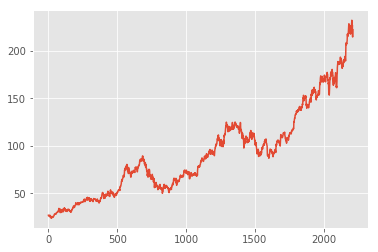

In [53]:
def visual_data_apple():
    df1 = pd.read_csv(r'C:\Users\User\Desktop\Code!\sp500_joined_closes.csv')
    df1['AAPL'].plot()
    plt.show()
visual_data_apple()

TypeError: Object of type 'ndarray' is not JSON serializable

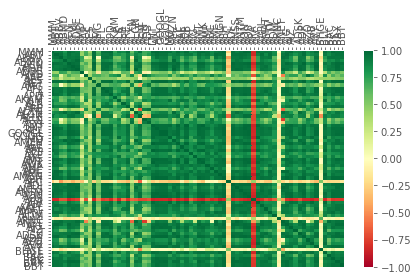

In [54]:
def visual_data_all():
    df = pd.read_csv(r'C:\Users\User\Desktop\Code!\sp500_joined_closes.csv')
    df_corr = df.corr()
    df_corr.to_csv(r'C:\Users\User\Desktop\Code!\sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)
    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()

visual_data_all()